In [1]:
# Load the Pandas libraries with alias 'pd' 
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getAcc(method, delay, lr):
    return f"data/acc_dm{method}_d{delay}_lr{lr}.csv" #acc_dmconstant_d1_lr0.01.csv

def getLoss(method, delay, lr):
    return f"data/loss_dm{method}_d{delay}_lr{lr}.csv"

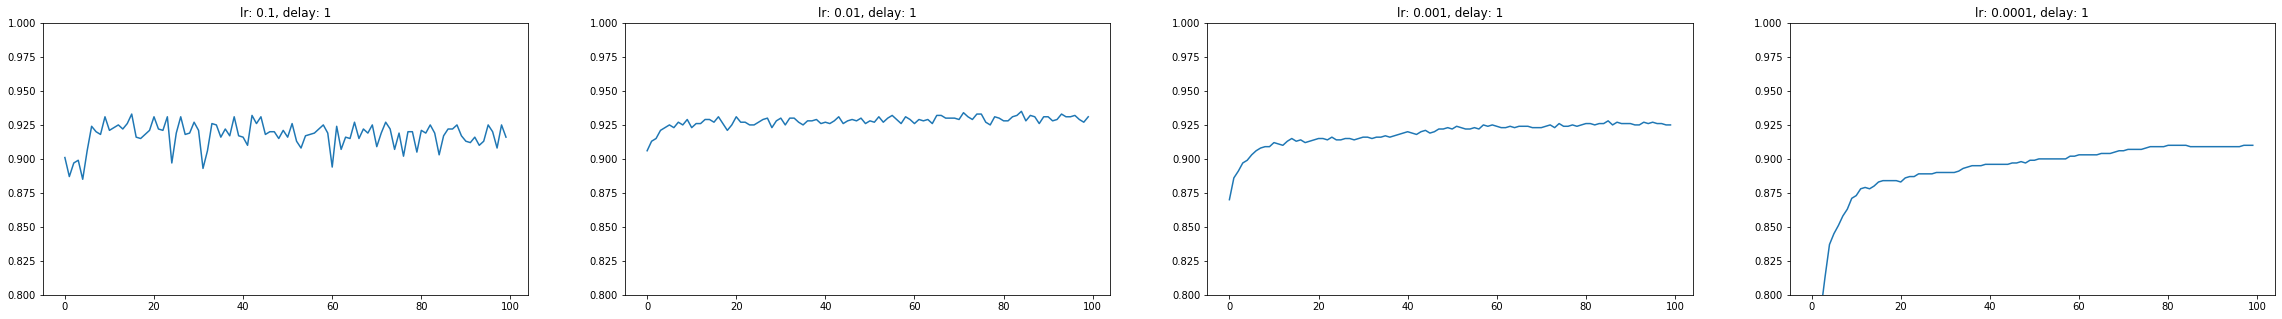

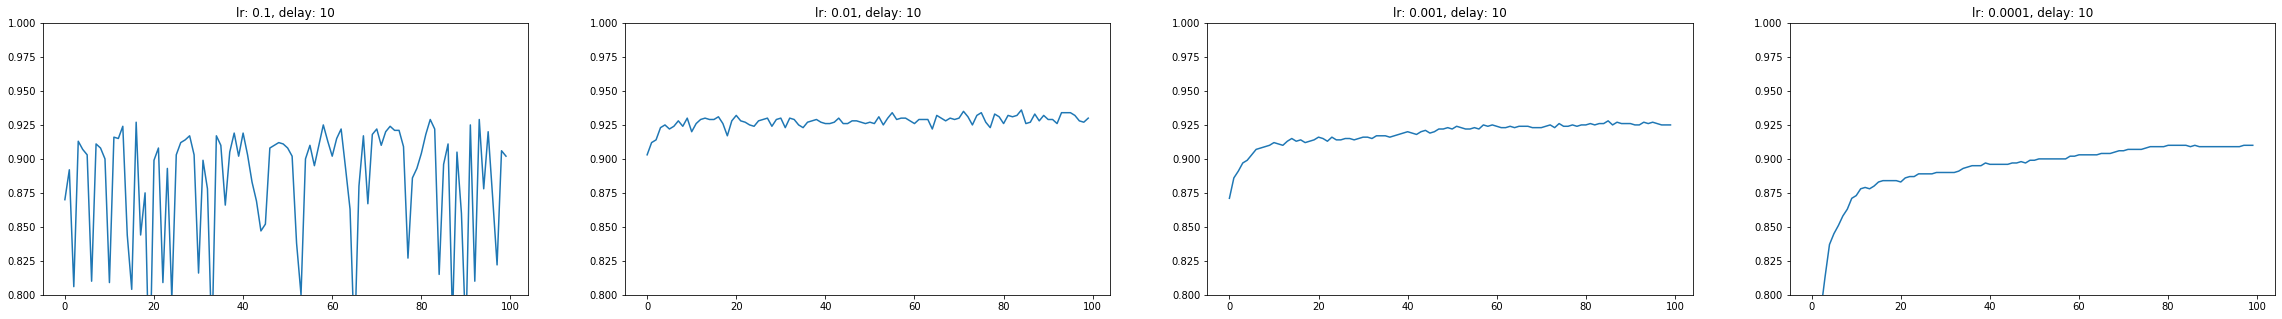

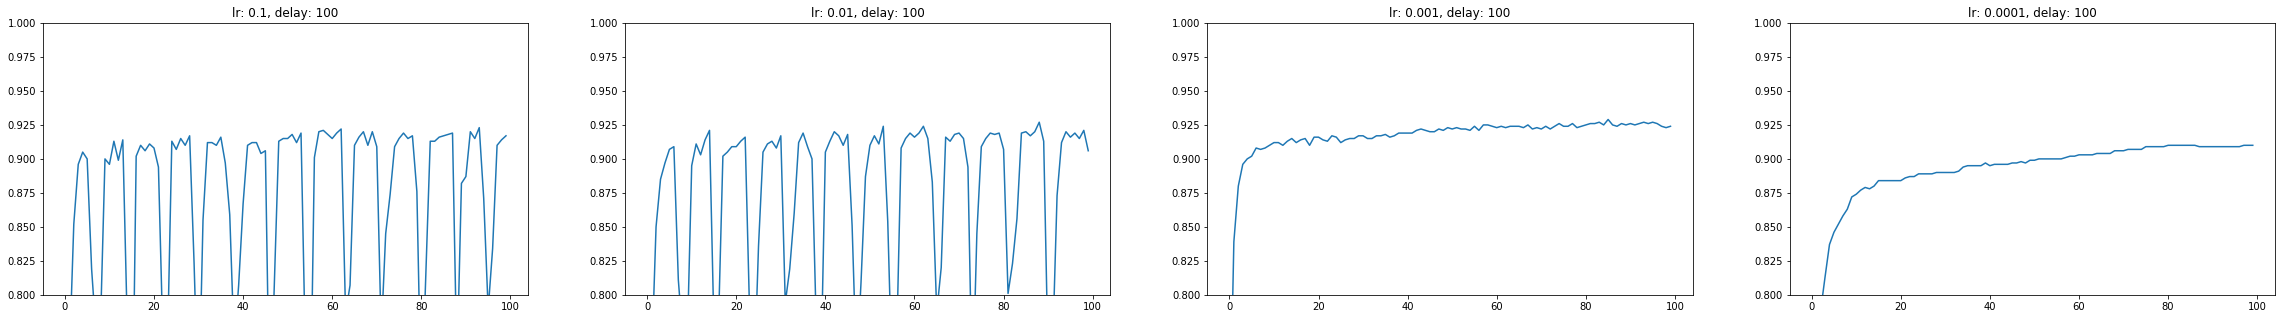

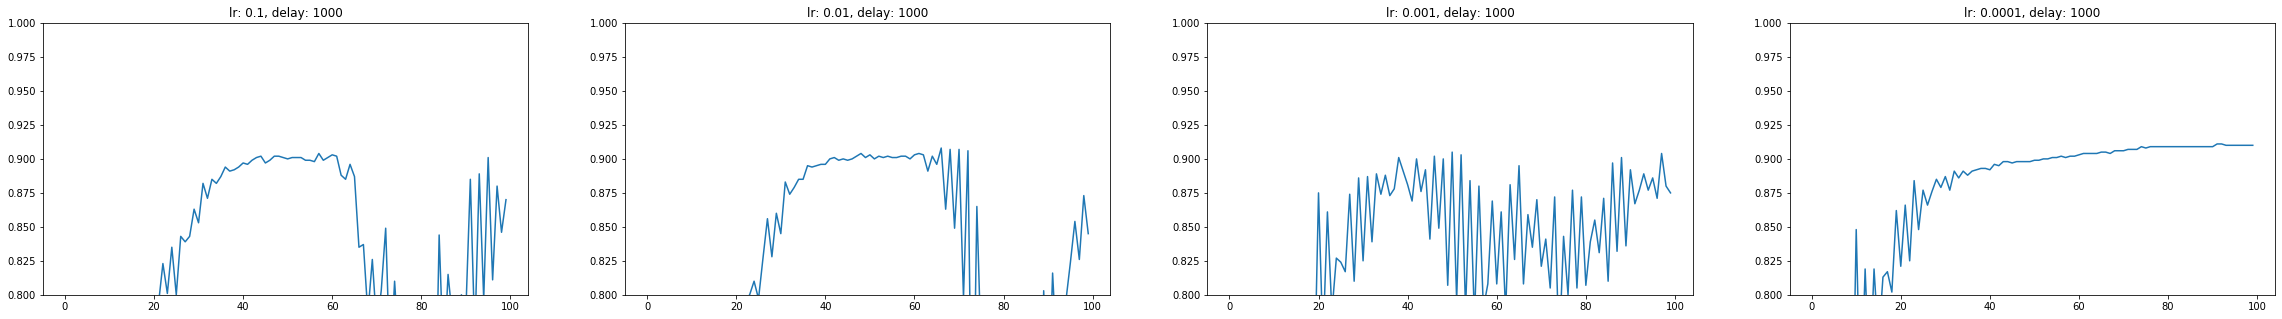

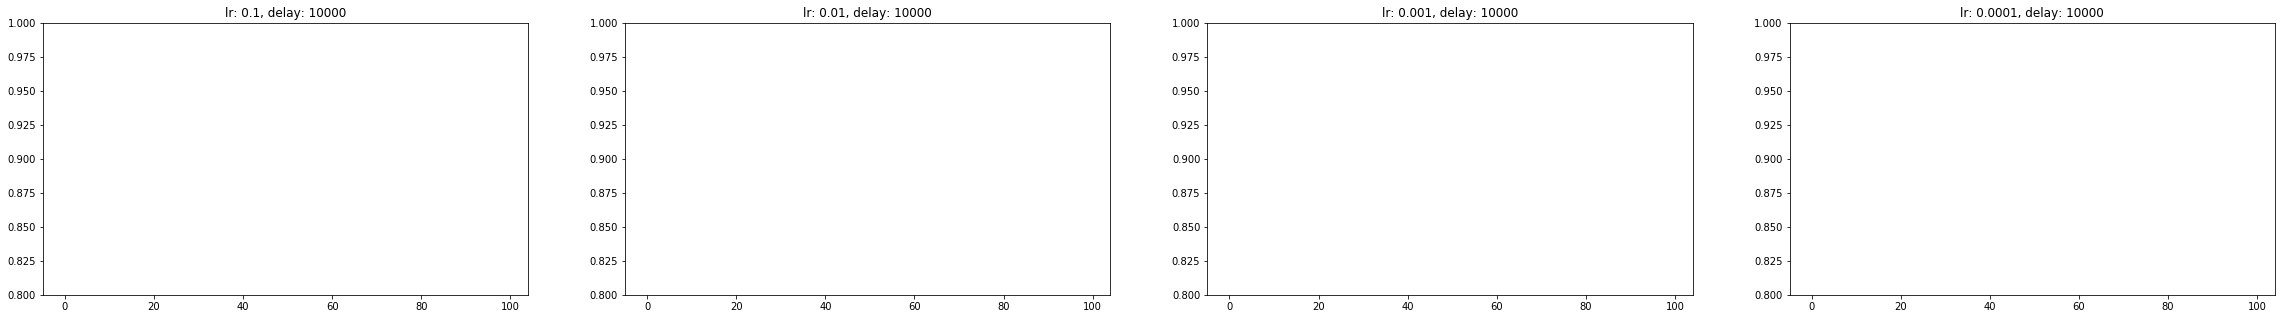

In [10]:
method = 'constant'
delays = [1, 10, 100, 1000, 10000]
lrs = [0.1, 0.01, 0.001, 0.0001]
for delay in delays:
    fig, ax = plt.subplots(1, len(lrs), figsize=(40, 5)) 
    for i, lr in enumerate(lrs):
        filename = getAcc(method, delay, lr)
        data = pd.read_csv(filename, header=None)
        ax[i].set_ylim(top=1) #ymax is your value
        ax[i].set_ylim(bottom=0.8) #ymin is your value
        ax[i].plot(data)
        ax[i].set_title(f"lr: {lr}, delay: {delay}")
    fig.savefig(f"figure_{delay}.pdf", bbox_inches='tight')

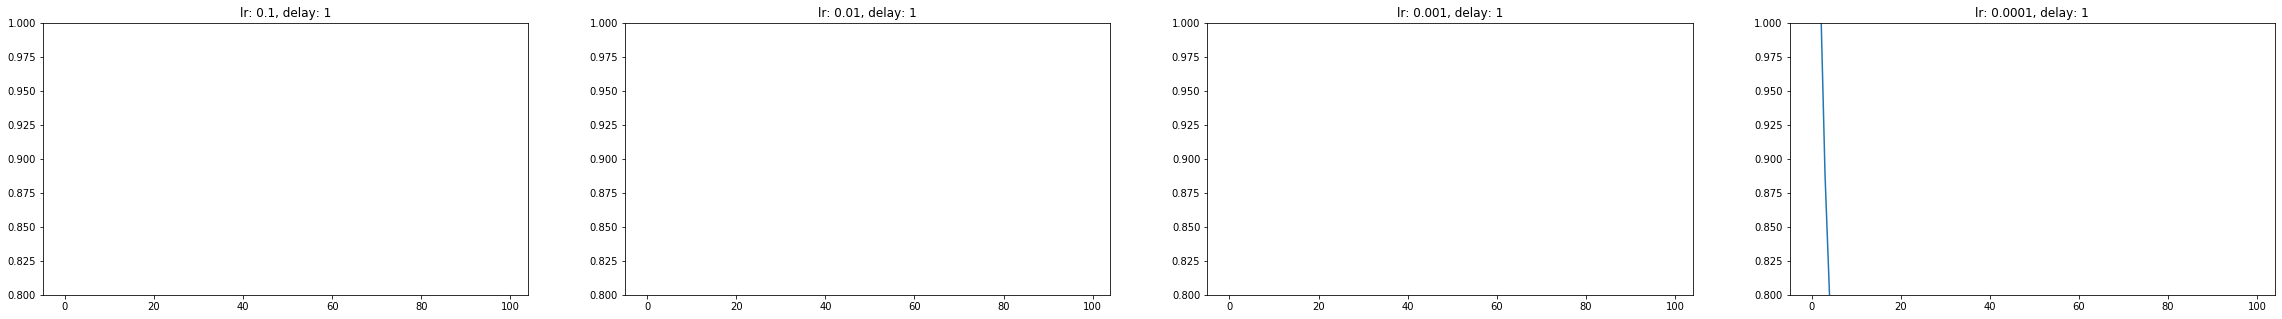

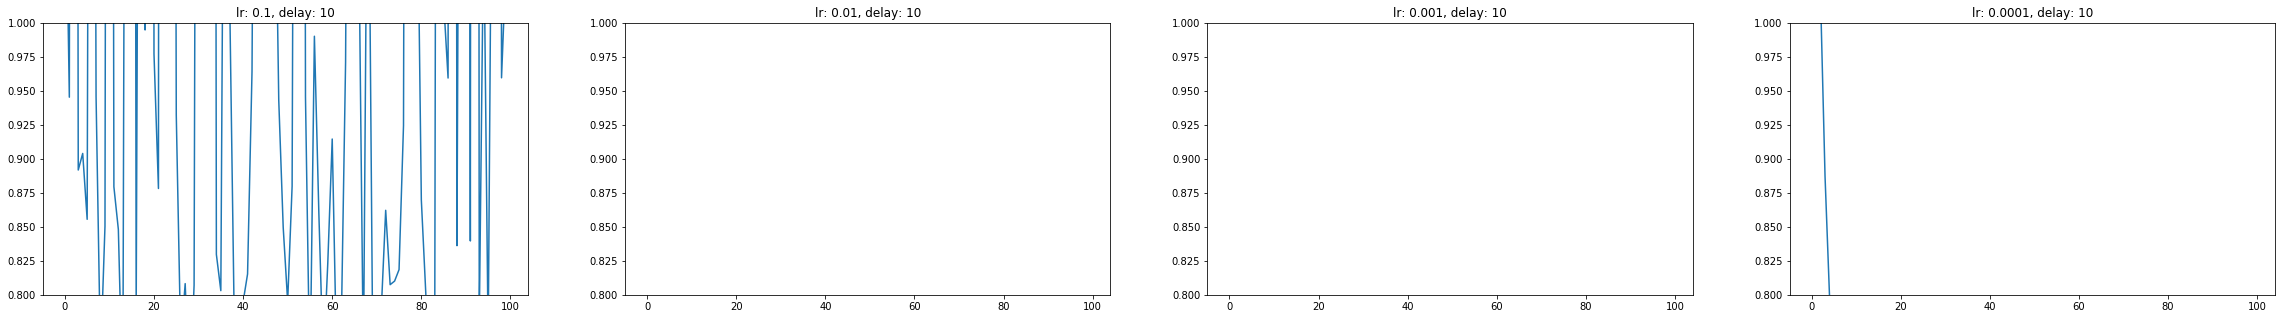

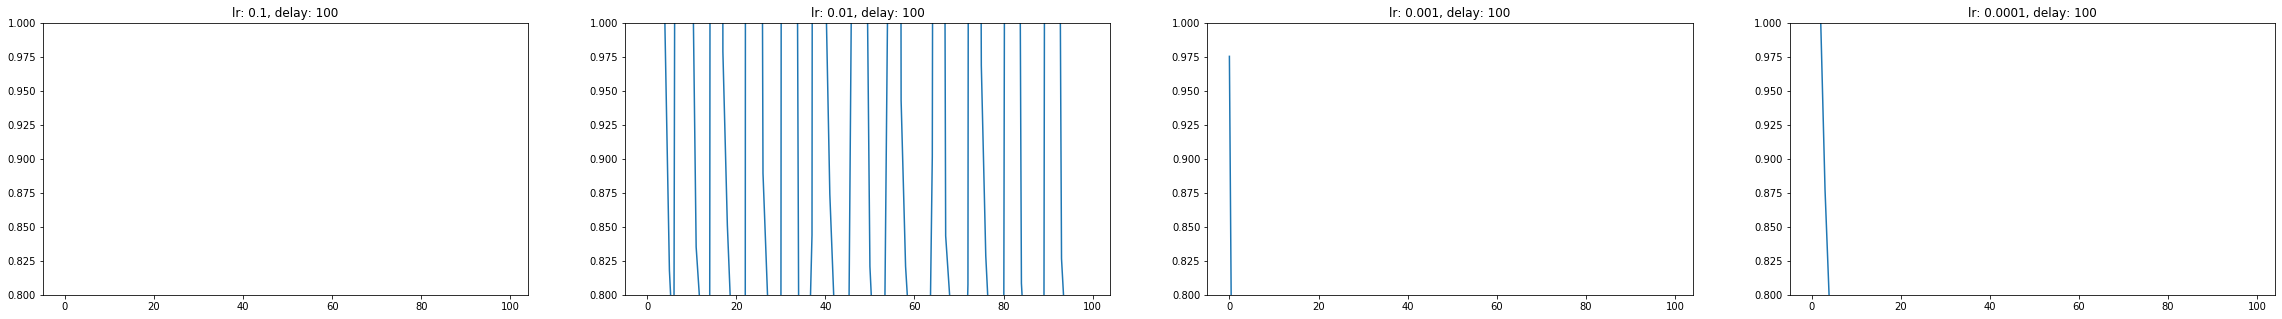

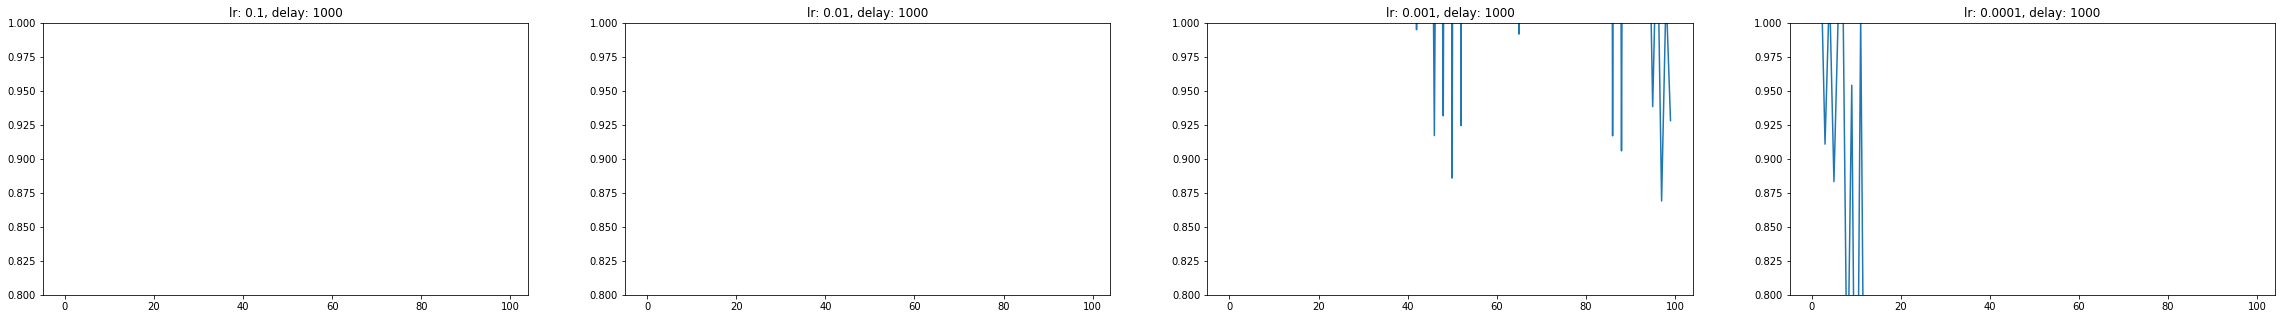

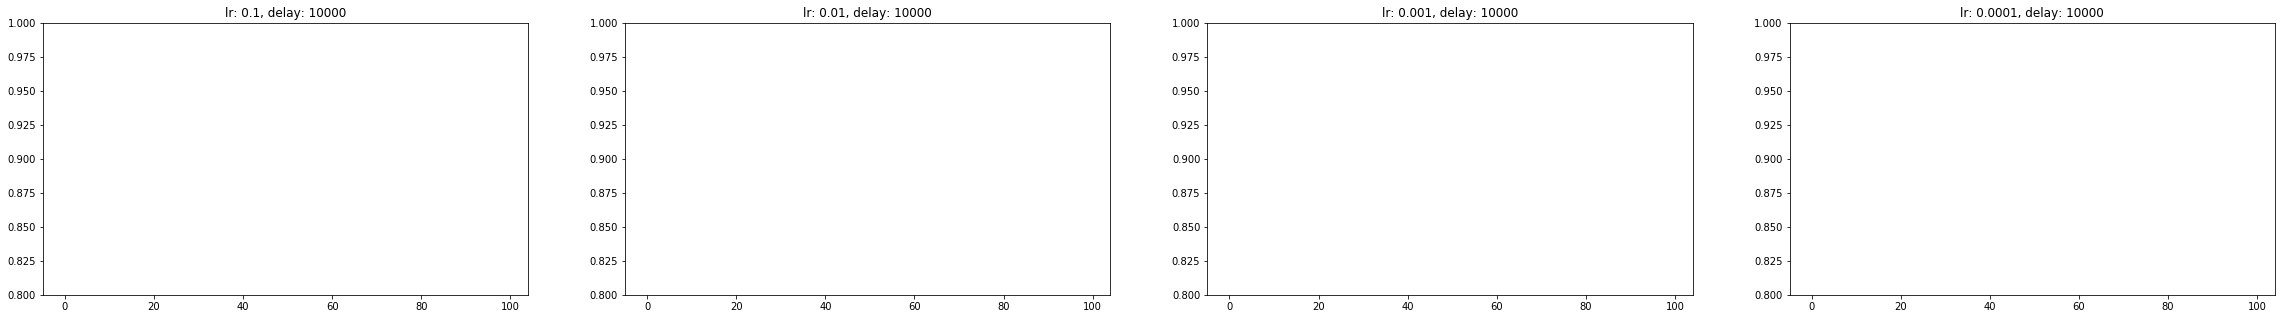

In [11]:
method = 'constant'
delays = [1, 10, 100, 1000, 10000]
lrs = [0.1, 0.01, 0.001, 0.0001]
for delay in delays:
    fig, ax = plt.subplots(1, len(lrs), figsize=(40, 5)) 
    for i, lr in enumerate(lrs):
        filename = getLoss(method, delay, lr)
        data = pd.read_csv(filename, header=None)
        ax[i].set_ylim(top=1) #ymax is your value
        ax[i].set_ylim(bottom=0.8) #ymin is your value
        ax[i].plot(data)
        ax[i].set_title(f"lr: {lr}, delay: {delay}")
    fig.savefig(f"figure_{delay}.pdf", bbox_inches='tight')

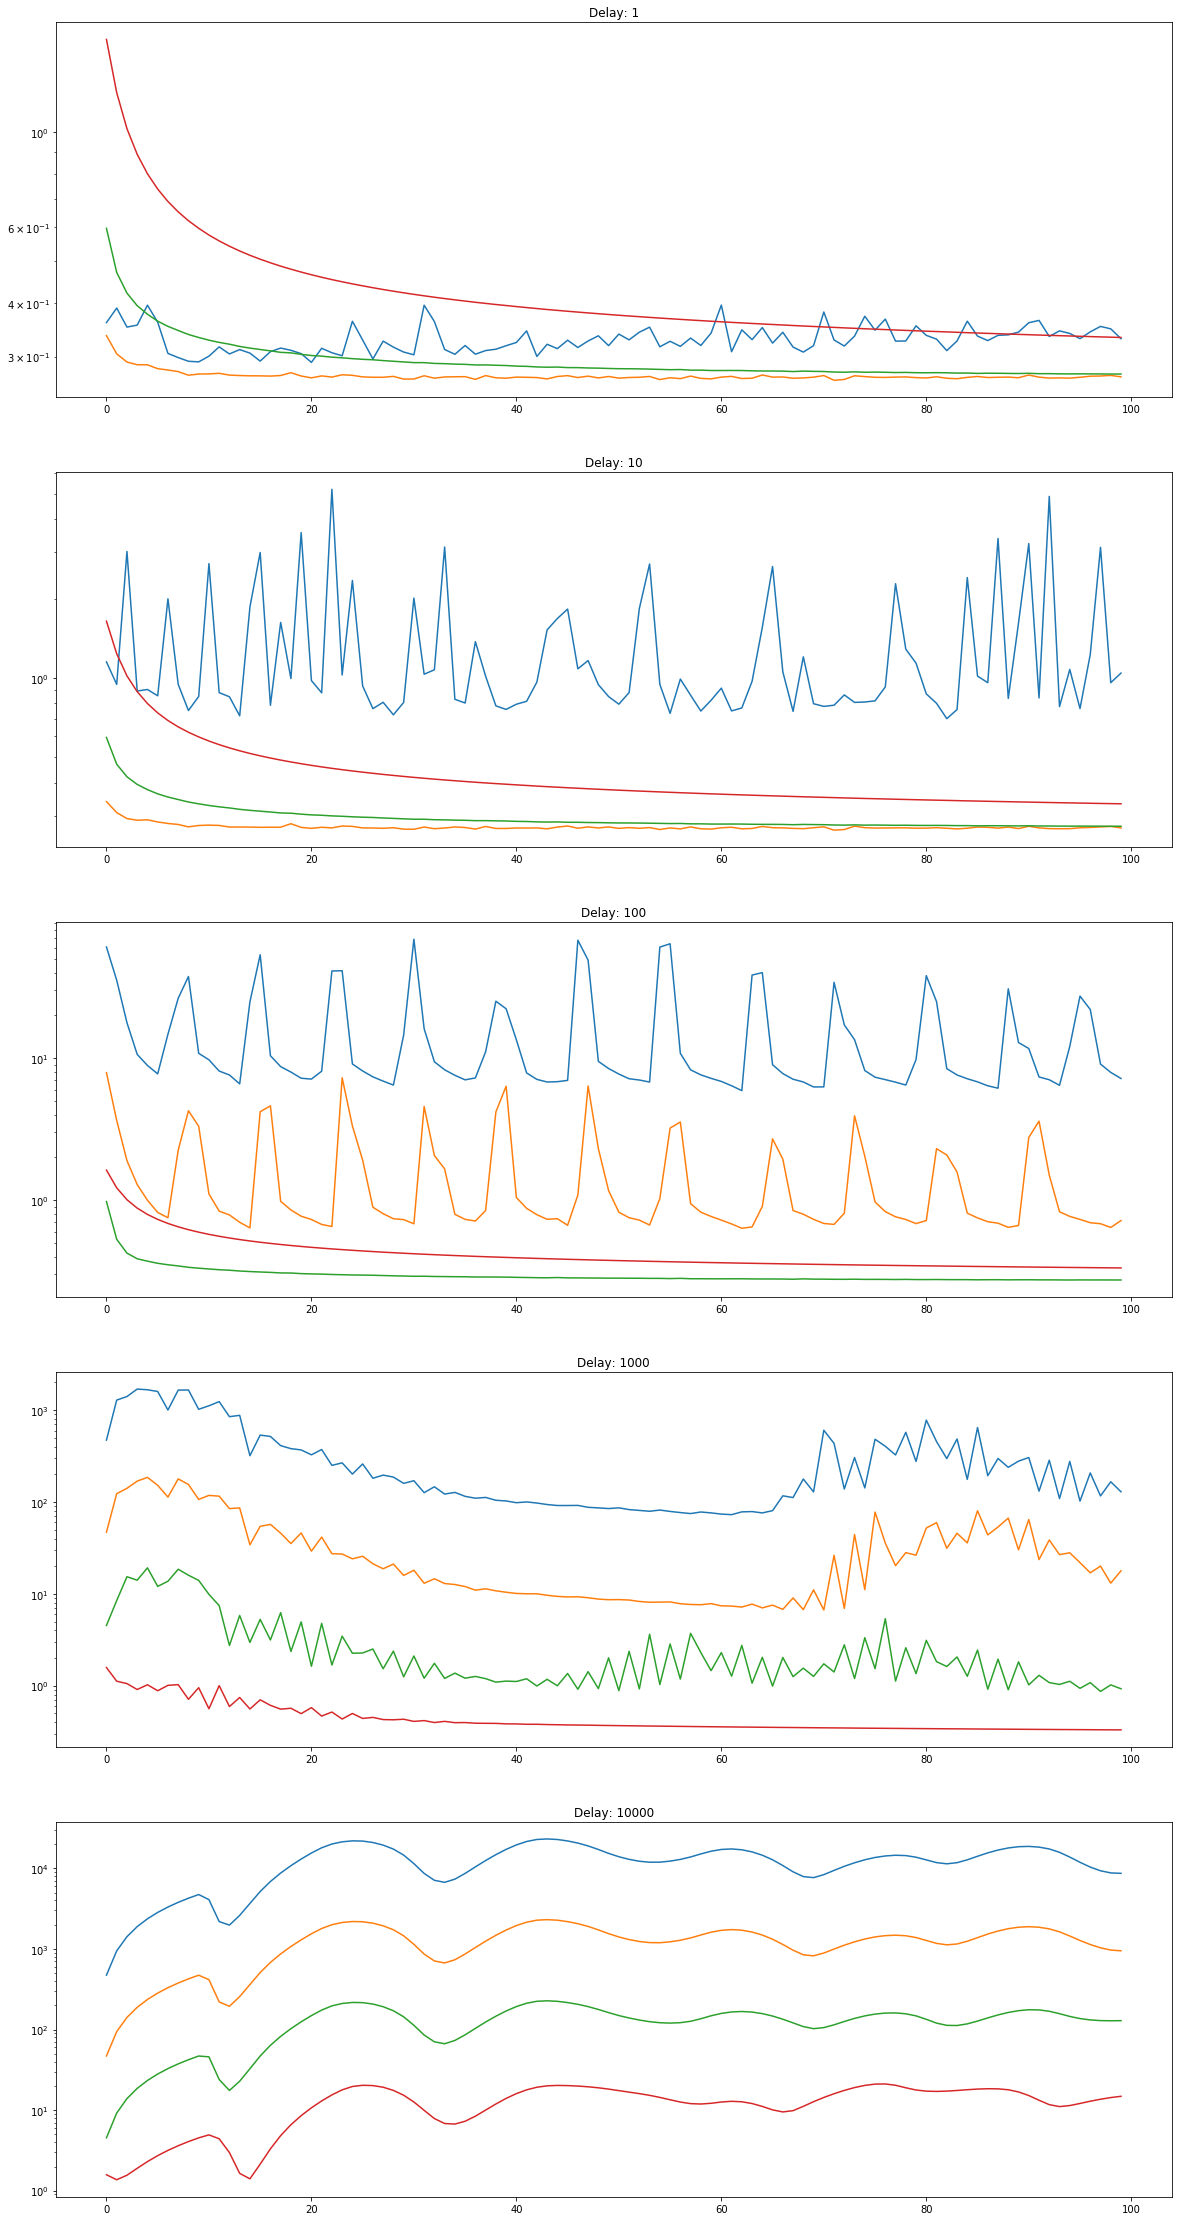

In [17]:
method = 'constant'
delays = [1, 10, 100, 1000, 10000]
lrs = [0.1, 0.01, 0.001, 0.0001]
fig, ax = plt.subplots(len(delays), figsize=(20, 40))
for i, delay in enumerate(delays):
    ax[i].set_title(f"Delay: {delay}")
    ax[i].set_yscale('log')
    for j, lr in enumerate(lrs):
        filename = getLoss(method, delay, lr)
        data = pd.read_csv(filename, header=None)
#         ax[i].set_ylim(top=1) #ymax is your value
#         ax[i].set_ylim(bottom=0.8) #ymin is your value
        ax[i].plot(data)
fig.savefig(f"loss_figure.pdf", bbox_inches='tight')

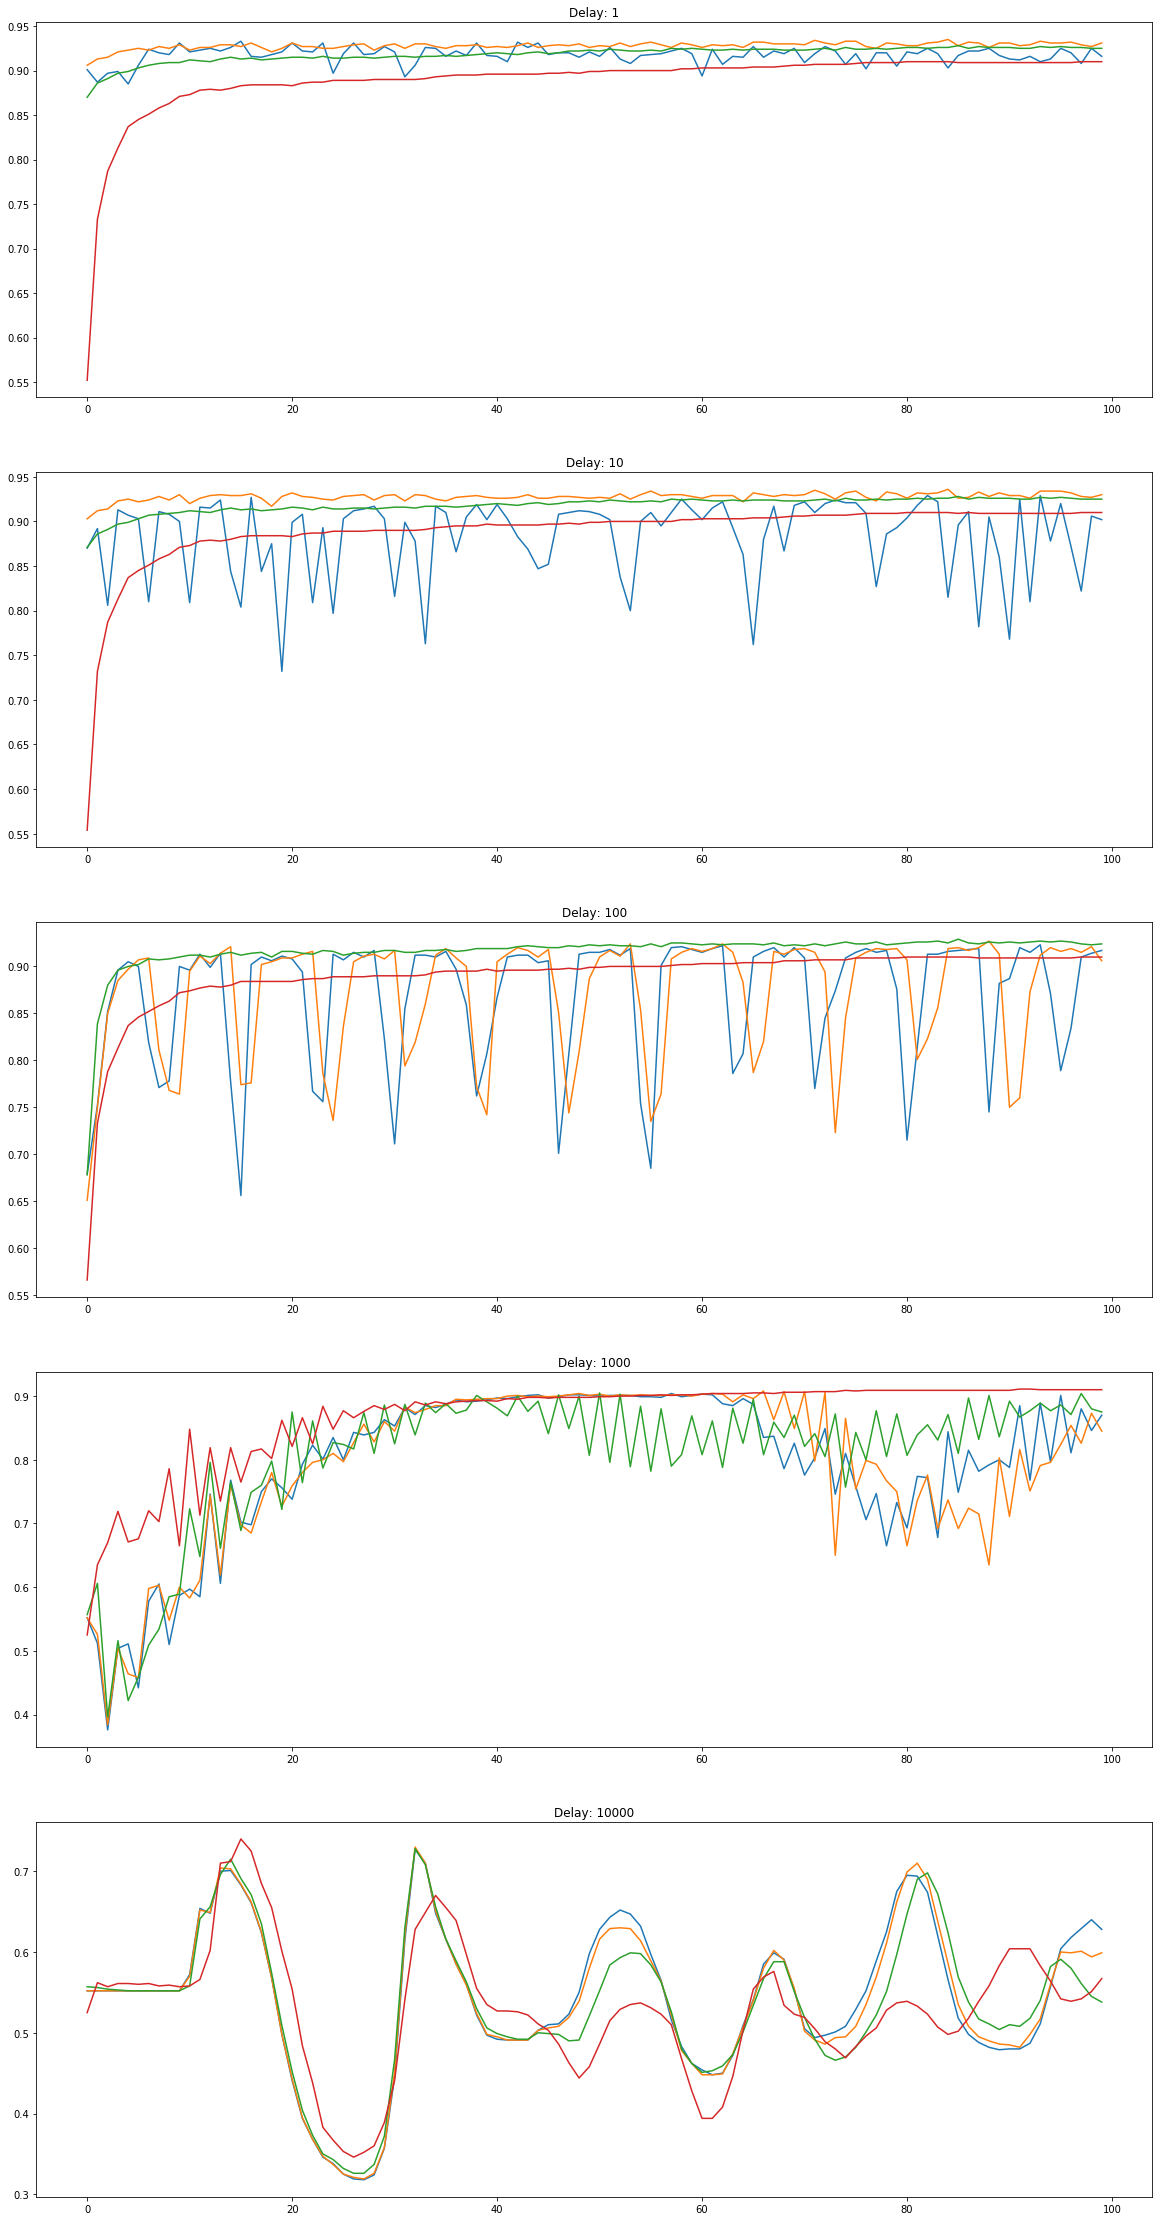

In [16]:
method = 'constant'
delays = [1, 10, 100, 1000, 10000]
lrs = [0.1, 0.01, 0.001, 0.0001]
fig, ax = plt.subplots(len(delays), figsize=(20, 40))
for i, delay in enumerate(delays):
    ax[i].set_title(f"Delay: {delay}")
    #ax[i].set_yscale('log')
    for j, lr in enumerate(lrs):
        filename = getAcc(method, delay, lr)
        data = pd.read_csv(filename, header=None)
#         ax[i].set_ylim(top=1) #ymax is your value
#         ax[i].set_ylim(bottom=0.8) #ymin is your value
        ax[i].plot(data)
fig.savefig(f"acc_figure.pdf", bbox_inches='tight')